# Preparação dos dados sobre mortalidade nos distritos do município de São Paulo

Este _notebook_ faz parte da análise das expectativas de vida nos diferentes distritos do município de São Paulo. 

**Objetivos** 
1. Captura dos dados brutos originais sobre mortalidade por idade e distrito.
2. Preparação dos dados para serem analisados (limpeza, tratamento e formatação).
3. Construção de função completa de processamento dos dados.

**Você vai aprender como:**
* [carregar arquivos](#csv-fora-do-padrao) CSV fora do padrão;
* realizar tarefas de seleção (ou eliminação) de linhas e colunas desnecessárias;
* transformar valores em texto para números (por exemplo, de "-" para 0); 
* [concatenar](#concatenacao) (empilhar) tabelas;
* implementar boas práticas de organização e reprodutibilidade do processamento de dados.

In [1]:
import pandas as pd
import sys
# Carrega código auxiliar no tutorial:
sys.path.append("../80_material-complementar/")
import auxiliar.geral as ag

## 1. Obtendo os dados brutos

Infelizmente, os dados sobre mortalidade nos distritos de São Paulo não estão disponíveis através de um processo automatizável. Por isso, aqui descrevemos o processo manual de obtenção dos dados.

Os dados necessários para o tutorial já foram baixados. Esse processo é descrito aqui caso você queira reproduzí-lo.

1. Acesse o link: <http://tabnet.saude.prefeitura.sp.gov.br/cgi/deftohtm3.exe?secretarias/saude/TABNET/SIM/obito.def>. 
2. Como linha, escolhemos "Idade detalhada". Como coluna, "Distrito Admin residência". E como conteúdo, "Óbitos residentes MSP". 
3. Em período disponível, apertamos a tecla CTRL para selecionar múltilos anos (de 2010 a 2019).
4. Clicamos no botão "Mostra".
5. Embaixo da tabela gerada, clicamos em "Copia como .CSV".
6. Salvamos o arquivo localmente.

**Boa prática:** salve o arquivo com um nome explicativo e em uma pasta específica para os dados. Por exemplo: `dados/brutos/obitos-resid_por_idade_distrito-resid_2010-2019.csv`

## 2. Características do arquivo de dados

Os dados de mortalidade estão no [formato CSV](../80_material-complementar/05_o-que-eh-CSV.ipynb), 
mas possuem várias características fora do padrão:
* o separador de colunas são `;` ao invés do padrão `,`;
* o arquivo começa com 3 linhas de explicações sobre os dados que não seguem a estrutura de tabela;
* o arquivo termina com 6 linhas de explicações que não seguem a estrutura de tabela.

Vejamos o começo e o final do arquivo:

In [2]:
# Começo (primeiras 5 linhas):
ag.mostra_linhas('dados/brutos/obitos-resid_por_idade_distrito-resid_2010-2019.csv', linha_fim=5, encoding='latin-1')

Mortalidade Geral
Óbitos Residentes MSP por Idade Detalhada e Distrito Admin residência
Período:2010-2019
"Idade Detalhada";"Água Rasa";"Alto de Pinheiros";"Anhanguera";"Aricanduva";"Artur Alvim";"Barra Funda";"Bela Vista";"Belém";"Bom Retiro";"Brás";"Brasilândia";"Butantã";"Cachoeirinha";"Cambuci";"Campo Belo";"Campo Grande";"Campo Limpo";"Cangaíba";"Capão Redondo";"Carrão";"Casa Verde";"Cidade Ademar";"Cidade Dutra";"Cidade Líder";"Cidade Tiradentes";"Consolação";"Cursino";"Ermelino Matarazzo";"Freguesia do Ó";"Grajaú";"Guaianases";"Iguatemi";"Ipiranga";"Itaim Bibi";"Itaim Paulista";"Itaquera";"Jabaquara";"Jaçanã";"Jaguara";"Jaguaré";"Jaraguá";"Jardim Ângela";"Jardim Helena";"Jardim Paulista";"Jardim São Luís";"José Bonifácio";"Lajeado";"Lapa";"Liberdade";"Limão";"Mandaqui";"Marsilac";"Moema";"Moóca";"Morumbi";"Parelheiros";"Pari";"Parque do Carmo";"Pedreira";"Penha";"Perdizes";"Perus";"Pinheiros";"Pirituba";"Ponte Rasa";"Raposo Tavares";"República";"Rio Pequeno";"Sacomã";"Santa Cecí

In [3]:
# Final (últimas 7 linhas):
ag.mostra_linhas('dados/brutos/obitos-resid_por_idade_distrito-resid_2010-2019.csv', linha_ini=-8, encoding='latin-1')

"Total";8648;3174;2357;7045;7608;1509;4826;4110;2212;2486;15944;4643;9800;3123;6060;6442;10622;9451;13017;7774;7509;15571;11203;7809;10251;4500;8388;6825;11555;17126;5982;6582;8712;7000;11821;13090;15192;6717;2073;2678;10205;12918;8123;6838;13771;6775;8983;6576;4986;6647;7882;377;5567;7552;2838;6932;1543;4235;6270;11200;7932;4398;5022;11952;6945;5178;4470;7351;14574;6617;10848;6417;5763;10630;10117;7495;6708;16854;9642;1748;3259;7951;12593;9107;4765;8878;7852;4787;8050;2301;8077;10740;8514;10538;8512;6383;2153;736774
Fonte: Sistema de Informações sobre Mortalidade  SIM/PRO-AIM  CEInfo SMS-SP
Notas:
1. Para tabulações de proporções, o campo referente à proporção deve constar em linhas ou colunas.
2. Os coeficientes de mortalidade podem ser tabuladas por Distrito Administrativo e seus agregados (Supervisão de Saúde e Região), faixa etária e sexo.
3. Os coeficientes de mortalidade por homicídio, aids, tuberculose e acidentes de trânsito foram calculados por 100.000 habitantes. 
4. A pa

Além disso, o arquivo utiliza o _encoding_ "latin1". 
Apesar de ser muito comum em arquivos brasileiros, esse _encoding_ não é o padrão do Python e do Pandas (o UTF8). Por isso, é preciso 
levar isso em conta ao carregar os dados. Se você quiser entender melhor o que é _encoding_, veja o _notebook_ 
[../80_material-complementar/10_o-que-eh-encoding.ipynb](../80_material-complementar/10_o-que-eh-encoding.ipynb).

<a id="csv-fora-do-padrao"></a>
## 3. Carregando arquivos CSV fora do padrão

O pacote Pandas possui métodos para carregar dados em diferentes formatos: `pd.read_excel` (arquivos .xlsx), `pd.read_csv` (arquivos .csv), 
`pd.read_json`, `pd.read_table`, entre outros. Aqui vamos utilizar o método `pd.read_csv`.

In [4]:
# Carregando os dados brutos de um arquivo CSV:
bruto_df = pd.read_csv('dados/brutos/obitos-resid_por_idade_distrito-resid_2010-2019.csv', sep=';', skiprows=3, skipfooter=6, encoding='latin-1', engine='python')

Se tentarmos carregar o arquivo sem especificar nenhum parâmetro opcional, o Pandas vai utilizar os parâmetros padrão e cair num erro. Por isso precisamos definir os seguintes parâmetros:

* `sep=';'` especifica que o separador de colunas é o ponto-e-vírgula `;` e não a vírgula `,`;
* `skiprows=3` pula as 3 primeiras linhas do arquivo, que não contém a estrutura de tabela;
* `skipfooter=6` pula as 6 últimas linhas do arquivo, que também não contém estrutura tabular;
* `encoding='latin-1'` diz para o Pandas ler o arquivo utilizando o [_encoding_](../80_material-complementar/10_o-que-eh-encoding.ipynb) "latin1".

Outras dicas úteis para os seguintes casos comuns:

* **Arquivo sem cabeçalho:** se o arquivo não contiver um cabeçalho com o nome das colunas, você pode usar o parâmetro `names` para especificar o nome das colunas a partir de uma lista. Por exemplo: `names=['nome', 'telefone', 'endereco']`.
* **Colunas desnecessárias e falta de memória:** se a tabela tiver colunas desnecessárias que consomem muita memória quando os dados são carregados, as colunas a serem carregadas podem ser especificadas com o `usecols` a partir de uma lista com o nome ou posição dessas colunas. Por exemplo: `usecols=[0,1]` ou `usecols=['Idade Detalhada', 'Água Rasa']`.
* **Especificando o tipo de variável:** se você quiser que um dado seja carregado como um tipo específico (por exemplo, `int` ou `str`), isso pode ser feito com o parâmetro `dtype`: `dtype=str` especifica que todas as colunas devem ser tratadas como `str`, e `dtype={'Idade Detalhada':str, 'Total':int}` especifica como cada coluna deve ser tratada.
* **Separador de milhares e de decimais:** se números na tabela estiverem escritos com separadores de milhar (por ex.: 1.683.483), você pode usar `thousands='.'`; e se o separador do decimal for a vírgula (ao invés do ponto), você pode utilizar decimal=',' para o Pandas ler os números corretamente (e como números e não strings). 

In [5]:
# Visualizando os dados:
bruto_df

,Idade Detalhada,Água Rasa,Alto de Pinheiros,Anhanguera,Aricanduva,Artur Alvim,Barra Funda,Bela Vista,Belém,Bom Retiro,...,Vila Jacuí,Vila Leopoldina,Vila Maria,Vila Mariana,Vila Matilde,Vila Medeiros,Vila Prudente,Vila Sônia,Ignorado,Total
0,< 1 hora,5,-,6,4,10,-,1,4,3,...,9,2,17,-,6,6,11,5,5,740
1,1 hora,2,-,7,4,13,1,2,3,2,...,15,-,11,8,8,12,8,8,6,910
2,2 horas,1,1,3,1,1,-,3,1,1,...,5,-,6,1,-,7,2,2,-,252
3,3 horas,3,-,2,2,2,2,-,2,1,...,4,-,5,1,-,1,5,2,-,165
4,4 horas,1,-,4,-,3,1,-,2,1,...,3,-,3,-,1,-,1,-,-,155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,115 anos,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,1
181,116 anos,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,1
182,127 anos,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,1
183,Ignorado,1,-,2,1,-,1,2,2,3,...,1,-,4,3,-,2,1,-,21,142


## 4. Limpando os dados

### 4.1. Selecionando linhas com `.query()`

Como vamos calcular a expectativa de vida a partir dos dados, não nos interessa as duas últimas linhas, que mostram informações que não estão associadas à idade das pessoas no momento do óbito. A penúltima linha mostra a quantidade de óbitos sem informação de idade, enquanto que a segunda mostra o total de óbitos, independentemente da idade. Para retirar essas linhas, vamos utilizar o método `query`:

In [6]:
# Copiamos o DataFrame para uma nova variável, para manter os dados brutos inalterados:
limpo_df = bruto_df.copy()
# Retiramos as duas últimas linhas:
limpo_df = limpo_df.query('`Idade Detalhada` != "Ignorado" & `Idade Detalhada` != "Total"')
# Mostra o resultado:
limpo_df

,Idade Detalhada,Água Rasa,Alto de Pinheiros,Anhanguera,Aricanduva,Artur Alvim,Barra Funda,Bela Vista,Belém,Bom Retiro,...,Vila Jacuí,Vila Leopoldina,Vila Maria,Vila Mariana,Vila Matilde,Vila Medeiros,Vila Prudente,Vila Sônia,Ignorado,Total
0,< 1 hora,5,-,6,4,10,-,1,4,3,...,9,2,17,-,6,6,11,5,5,740
1,1 hora,2,-,7,4,13,1,2,3,2,...,15,-,11,8,8,12,8,8,6,910
2,2 horas,1,1,3,1,1,-,3,1,1,...,5,-,6,1,-,7,2,2,-,252
3,3 horas,3,-,2,2,2,2,-,2,1,...,4,-,5,1,-,1,5,2,-,165
4,4 horas,1,-,4,-,3,1,-,2,1,...,3,-,3,-,1,-,1,-,-,155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,113 anos,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,5
179,114 anos,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,2
180,115 anos,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,1
181,116 anos,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,1


### 4.2. Selecionando colunas com `.iloc()`

Note que as duas últimas colunas também apresentam o total de óbitos por idade (independentemente do distrito) e o número de óbitos sem registro do distrito de residência. Vamos retirar essas colunas utilizando um outro método de seleção de colunas, o `iloc`:

In [7]:
# Seleciona todas as linhas e todas as colunas, menos as duas últimas:
# (CUIDADO! Se você executar esta célula uma segunda vez, vai remover outras duas colunas)
limpo_df = limpo_df.iloc[:, :-2]
# Mostra o resultado:
limpo_df

,Idade Detalhada,Água Rasa,Alto de Pinheiros,Anhanguera,Aricanduva,Artur Alvim,Barra Funda,Bela Vista,Belém,Bom Retiro,...,Vila Formosa,Vila Guilherme,Vila Jacuí,Vila Leopoldina,Vila Maria,Vila Mariana,Vila Matilde,Vila Medeiros,Vila Prudente,Vila Sônia
0,< 1 hora,5,-,6,4,10,-,1,4,3,...,5,4,9,2,17,-,6,6,11,5
1,1 hora,2,-,7,4,13,1,2,3,2,...,11,4,15,-,11,8,8,12,8,8
2,2 horas,1,1,3,1,1,-,3,1,1,...,3,1,5,-,6,1,-,7,2,2
3,3 horas,3,-,2,2,2,2,-,2,1,...,-,1,4,-,5,1,-,1,5,2
4,4 horas,1,-,4,-,3,1,-,2,1,...,-,-,3,-,3,-,1,-,1,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,113 anos,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
179,114 anos,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
180,115 anos,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
181,116 anos,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


### 4.3. Substituindo strings com `.str.replace()`

Outro problema que temos é que, quando as mortes não existem, elas são representadas por "-" ao invés de zero. Além disso (e por causa disso), as colunas são do tipo `string`:

In [8]:
type(limpo_df.loc[0, 'Água Rasa'])

str

Vamos resolver esses dois problemas:

In [9]:
# Pegamos a lista de colunas da tabela:
colunas = limpo_df.columns
# Passamos por todas, menos a primeira (que é a idade):
for col in colunas[1:]:
    limpo_df[col] = limpo_df[col].str.replace('-', '0', regex=False).astype(int)
# Mostra o resultado:
limpo_df

,Idade Detalhada,Água Rasa,Alto de Pinheiros,Anhanguera,Aricanduva,Artur Alvim,Barra Funda,Bela Vista,Belém,Bom Retiro,...,Vila Formosa,Vila Guilherme,Vila Jacuí,Vila Leopoldina,Vila Maria,Vila Mariana,Vila Matilde,Vila Medeiros,Vila Prudente,Vila Sônia
0,< 1 hora,5,0,6,4,10,0,1,4,3,...,5,4,9,2,17,0,6,6,11,5
1,1 hora,2,0,7,4,13,1,2,3,2,...,11,4,15,0,11,8,8,12,8,8
2,2 horas,1,1,3,1,1,0,3,1,1,...,3,1,5,0,6,1,0,7,2,2
3,3 horas,3,0,2,2,2,2,0,2,1,...,0,1,4,0,5,1,0,1,5,2
4,4 horas,1,0,4,0,3,1,0,2,1,...,0,0,3,0,3,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,113 anos,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
179,114 anos,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
180,115 anos,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
181,116 anos,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 4.4. Agregando dados de até um ano de idade

Nós gostaríamos que as linhas representassem intervalos iguais de tempo (por exemplo, anos). Entretanto, para melhor monitoramento da mortalidade infantil, 
as primeiras linhas contabilizam os óbitos em horas e, depois, em meses. Vamos somar todos esses resultados e colocar um rótulo de 0 anos. Para isso, primeiro vamos selecionar essas linhas com o método `loc` (que é diferente do `iloc`):

In [10]:
ate_1_ano_df = limpo_df.loc[limpo_df['Idade Detalhada'].str.contains('hora') | limpo_df['Idade Detalhada'].str.contains('dia') | limpo_df['Idade Detalhada'].str.contains('mes')]
ate_1_ano_df

,Idade Detalhada,Água Rasa,Alto de Pinheiros,Anhanguera,Aricanduva,Artur Alvim,Barra Funda,Bela Vista,Belém,Bom Retiro,...,Vila Formosa,Vila Guilherme,Vila Jacuí,Vila Leopoldina,Vila Maria,Vila Mariana,Vila Matilde,Vila Medeiros,Vila Prudente,Vila Sônia
0,< 1 hora,5,0,6,4,10,0,1,4,3,...,5,4,9,2,17,0,6,6,11,5
1,1 hora,2,0,7,4,13,1,2,3,2,...,11,4,15,0,11,8,8,12,8,8
2,2 horas,1,1,3,1,1,0,3,1,1,...,3,1,5,0,6,1,0,7,2,2
3,3 horas,3,0,2,2,2,2,0,2,1,...,0,1,4,0,5,1,0,1,5,2
4,4 horas,1,0,4,0,3,1,0,2,1,...,0,0,3,0,3,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,7 meses,0,0,1,1,2,0,0,1,1,...,5,1,5,0,5,0,1,5,0,1
62,8 meses,1,0,3,2,2,0,0,1,1,...,0,0,6,0,7,1,2,6,0,0
63,9 meses,0,0,2,2,2,0,1,2,1,...,3,1,4,0,2,2,1,2,0,5
64,10 meses,0,0,1,0,4,0,0,1,1,...,2,1,5,0,3,3,0,0,0,1


In [11]:
# Seleciona colunas de distritos e soma os óbitos em cada coluna:
soma_ate_1_ano = ate_1_ano_df.iloc[:, 1:].sum()
# Mostra o resultado:
soma_ate_1_ano

Água Rasa             75
Alto de Pinheiros     22
Anhanguera           128
Aricanduva           106
Artur Alvim          163
                    ... 
Vila Mariana          76
Vila Matilde         126
Vila Medeiros        224
Vila Prudente        121
Vila Sônia           150
Length: 96, dtype: int64

In [12]:
# Transforma a série em uma linha de uma tabela:
soma_ate_1_ano_df = soma_ate_1_ano.to_frame().transpose()
# Adiciona a coluna de idade:
soma_ate_1_ano_df.insert(0, 'Idade Detalhada', '0 anos')
# Mostra o resultado:
soma_ate_1_ano_df

,Idade Detalhada,Água Rasa,Alto de Pinheiros,Anhanguera,Aricanduva,Artur Alvim,Barra Funda,Bela Vista,Belém,Bom Retiro,...,Vila Formosa,Vila Guilherme,Vila Jacuí,Vila Leopoldina,Vila Maria,Vila Mariana,Vila Matilde,Vila Medeiros,Vila Prudente,Vila Sônia
0,0 anos,75,22,128,106,163,31,68,98,65,...,118,76,287,35,258,76,126,224,121,150


<a id="concatenacao"></a>
### 4.5. Concatenando tabelas

Agora vamos juntar essa linha com a tabela dos demais anos. Para selecionar os dados referentes às idades em anos, vamos utilizar novamente o método `loc` com uma série booleana construída com o método 
`str.contains`. Mas, dessa vez, vamos simplificar utilizando [expressões regulares](https://pt.wikipedia.org/wiki/Express%C3%A3o_regular) e utilizando o símbolo de negação `~`. Em seguida, vamos utilizar o método `concat` de concatenar tabelas: 

In [13]:
# Seleciona linhas que contabilizam óbitos por ano:
mais_1_ano_df = limpo_df.loc[~limpo_df['Idade Detalhada'].str.contains('hora|dia|mes', regex=True)]

# Junta as duas tabelas:
limpo_df = pd.concat([soma_ate_1_ano_df, mais_1_ano_df])

Para confirmar que fizemos a soma da maneira correta, vamos comparar nosso resultado com o que veio na tabela de dados brutos:

In [14]:
#### Pega o total por distrito da tabela bruta e subtrai os óbitos com idades ignoradas:
#                                  TOTAL                                              IDADE IGNORADA
total_com_idade = bruto_df.iloc[-1, 1:-2].str.replace('-', '0').astype(int) - bruto_df.iloc[-2, 1:-2].str.replace('-', '0').astype(int)
# Verifica se os valores por coluna são iguais:
verif_por_coluna = (limpo_df.iloc[:, 1:].sum() == total_com_idade)
# Verifica se todos os valores são iguais:
verif_por_coluna.all()

True

### 4.6. Mudando o tipo de variável dos dados

Por último, vamos deixar a coluna da idade num formato mais apropriado:

In [15]:
# Retiramos a palavra 'ano' ou 'anos' e transformamos o que sobra em números inteiros:
limpo_df['Idade Detalhada'] = limpo_df['Idade Detalhada'].str.replace('anos?', '', regex=True).astype(int)
# Define a idade como índice da tabela (nome das linhas) e joga o índica anterior fora:
#limpo_df.set_index('Idade Detalhada', drop=True, inplace=True)
# Mostra o resultado:
limpo_df

,Idade Detalhada,Água Rasa,Alto de Pinheiros,Anhanguera,Aricanduva,Artur Alvim,Barra Funda,Bela Vista,Belém,Bom Retiro,...,Vila Formosa,Vila Guilherme,Vila Jacuí,Vila Leopoldina,Vila Maria,Vila Mariana,Vila Matilde,Vila Medeiros,Vila Prudente,Vila Sônia
0,0,75,22,128,106,163,31,68,98,65,...,118,76,287,35,258,76,126,224,121,150
66,1,11,2,8,3,10,1,5,12,6,...,5,6,18,4,12,12,11,22,11,5
67,2,3,1,2,2,3,2,0,6,3,...,5,3,17,0,6,8,4,7,4,4
68,3,6,0,5,3,3,0,2,0,3,...,2,3,8,2,2,5,2,6,3,2
69,4,0,0,4,0,2,0,4,3,2,...,2,0,4,1,4,7,2,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,113,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
179,114,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
180,115,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
181,116,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 4.7. Salvando a tabela final

**Boa prática:** é uma boa prática em análise de dados salvar os dados limpos. Isso permite que você:
1. Economize tempo no projeto, já carregando os dados limpos nas próximas etapas.
2. Possa aproveitar os dados já limpos em outros projetos.

Também é uma boa prática salvar os dados limpos em uma pasta separada e utilizar um nome descritivo:

In [16]:
# Salva os dados limpos em arquivo (mantemos o código comentado para evitar reescrever os dados já salvos):
#limpo_df.to_csv('dados/limpos/obitos-resid_por_idade_distrito-resid_2010-2019_limpo.csv', index=False)

O cálculo da expectativa de vida nos diferentes distritos é feito no notebook: 
[10_analise_exp-vida_distritos_municipio-SP.ipynb](10_analise_exp-vida_distritos_municipio-SP.ipynb)

## 5. Criando pipeline para recortes

**Boa prática:** construa uma função que faz a limpeza dos dados. Essa função pode ser composta por outras funções, onde cada uma faz um processamento específico. Isso:
1. Organiza o código.
2. Deixa o código mais fácil de ser lido.
3. Facilita que a mesma limpeza seja aplicada a outros conjuntos de dados (de outros anos ou para segmentos da população) de maneira consistente.

Também é uma boa prática escrever a docstring das funções. Isso vai permitir que outras pessoas (e você mesmo, no futuro) possa entender melhor o código e reutilizá-lo, se necessário.

In [17]:
import pandas as pd
import matplotlib.pyplot as pl
from glob import glob

### 3.1. Funções

In [18]:
def pega_linha_com(linhas, substr, erro=True):
    """
    Seleciona os elementos da lista `linhas` que contém a substring
    `substr`. Retorna uma lista.
    
    Se `erro` for True, levanta um erro caso encontre um número de
    linhas diferente de 1.
    """
    
    selecao = list(filter(lambda s: s.find(substr) != -1, linhas))
    
    # Testes sobre a saída:
    if erro is True:
        assert len(selecao) < 2, 'Encontrado mais de uma linha com a substring "{}".'.format(substr)
        assert len(selecao) > 0, 'Não encontrara nenhuma linha com a substring "{}".'.format(substr)
    
    return selecao

In [19]:
def pega_sexo_cor(filename):
    """
    Dado uma tabela CSV bruta do Tabnet armazenada no arquivo `filename`
    e que trate de um Sexo e uma Raça/Cor específicos, retorna o sexo
    e cor do recorte, que devem estar armazenados nas primeiras linhas
    da tabela.
    
    Returns
    -------
    sexo : str
        O Sexo do recorte.
    cor : str
        A cor/raça do recorte.
    """
    
    # Lê arquivo:
    with open(filename, 'r', encoding='latin-1') as f:
        texto = f.read()
    # Quebra em linhas:
    linhas = texto.split('\n')

    # Pega a cor do recorte:
    linha = pega_linha_com(linhas, 'Cor')[0]
    cor   = linha.split(':')[1].strip()
    
    # Pega o sexo do recorte:
    linha = pega_linha_com(linhas, 'Sexo')[0]
    sexo  = linha.split(':')[1].strip()
    
    return sexo, cor

In [20]:
def limpa_obitos_p_expectativa_vida(bruto_df):
    """
    Trata um DataFrame de óbitos por idade detalhada (linhas) e distritos 
    (colunas):
    - Retira linhas e colunas com totais (valores agregados).
    - Retira idade ignorada (pois não dá pra calcular a expectativa de vida).
    - Transforma óbitos e idades em números.
    - Agrega óbitos até 1 ano na linha 0 anos.
    
    Returns
    -------
    limpo_df : DataFrame
    """
    
    # Copiamos o DataFrame para uma nova variável, para manter os dados brutos inalterados:
    limpo_df = bruto_df.copy()

    # Retiramos as duas últimas linhas (idade ignorada e total):
    limpo_df = limpo_df.query('`Idade Detalhada` != "Ignorado" & `Idade Detalhada` != "Total"')
    # Remove coluna com o total:
    limpo_df = limpo_df.loc[:, limpo_df.columns != 'Total']

    # Passamos por todas, menos a primeira (que é a idade):
    for col in limpo_df.columns[1:]:
        # Transforma a contabilização de óbitos em números:
        limpo_df[col] = limpo_df[col].str.replace('-', '0', regex=False).astype(int)

    ### Agregando mortalidade infantil (até 1 ano) ###
    # Seleciona período antes de um ano de vida:
    ate_1_ano_df = limpo_df.loc[limpo_df['Idade Detalhada'].str.contains('hora|dia|mes', regex=True)]
    # Seleciona colunas de distritos e soma os óbitos em cada coluna:
    soma_ate_1_ano = ate_1_ano_df.iloc[:, 1:].sum()
    # Transforma a série em uma linha de uma tabela:
    soma_ate_1_ano_df = soma_ate_1_ano.to_frame().transpose()
    # Adiciona a coluna de idade:
    soma_ate_1_ano_df.insert(0, 'Idade Detalhada', '0 anos')
    # Seleciona linhas que contabilizam óbitos por ano:
    mais_1_ano_df = limpo_df.loc[~limpo_df['Idade Detalhada'].str.contains('hora|dia|mes', regex=True)]
    # Junta as duas tabelas:
    limpo_df = pd.concat([soma_ate_1_ano_df, mais_1_ano_df])


    ### Teste de sanidade: verifica se a manipulação feita até aqui alterou o total de óbitos por distrito ###
    # Pega o total por distrito da tabela bruta e subtrai os óbitos com idades ignoradas:
    #                                  TOTAL                                              IDADE IGNORADA
    total_com_idade = bruto_df.iloc[-1, 1:-1].str.replace('-', '0').astype(int) - bruto_df.iloc[-2, 1:-1].str.replace('-', '0').astype(int)
    # Verifica se os valores por coluna são iguais:
    verif_por_coluna = (limpo_df.iloc[:, 1:].sum() == total_com_idade)
    # Verifica se todos os valores são iguais:
    assert verif_por_coluna.all(), 'O processamento dos dados alterou o total de óbitos por distrito.'

    # Coloca a idade como número inteiro:
    limpo_df['Idade Detalhada'] = limpo_df['Idade Detalhada'].str.replace('anos?', '', regex=True).astype(int)

    return limpo_df

In [21]:
def carrega_trata_obitos_com_recorte(arquivo):
    """
    Carrega e trata dados de óbitos por idade (linha) e distrito
    (coluna), para arquivos brutos do TabNet com recortes de
    sexo e raça.
    """

    # Carregando os dados brutos de um arquivo CSV:
    bruto_df = pd.read_csv(arquivo, sep=';', skiprows=5, skipfooter=6, encoding='latin-1', engine='python')

    # Trata os dados para calcular a expectativa de vida por distrito:
    limpo_df = limpa_obitos_p_expectativa_vida(bruto_df)

    # Pega sexo e cor do recorte:
    sexo, cor = pega_sexo_cor(arquivo)
    # Adiciona informações do recorte:
    limpo_df.insert(1, 'Sexo', sexo)
    limpo_df.insert(1, 'Cor/Raça', cor)
    
    return limpo_df

### 3.2. Carregando e tratando arquivos

In [22]:
# Listando arquivos:
arquivos = glob('dados/brutos/obitos-resid_por_idade_distrito-resid_2010-2019_*.csv')

Vamos aplicar a função criada para carregar e limpar os dados sobre óbitos para segmentos da população. Ao aplicarmos a mesma função a todos os segmentos, 
temos mais segurança de que não estamos introduzindo diferenças espúrias, causadas por processamentos diferentes. 

In [23]:
# Carrega e limpa os dados de óbitos segmentados por sexo e raça:
fem_preta_df   = carrega_trata_obitos_com_recorte(arquivos[1])
fem_parda_df   = carrega_trata_obitos_com_recorte(arquivos[10])
fem_branca_df  = carrega_trata_obitos_com_recorte(arquivos[14])
masc_preta_df  = carrega_trata_obitos_com_recorte(arquivos[0])
masc_parda_df  = carrega_trata_obitos_com_recorte(arquivos[4])
masc_branca_df = carrega_trata_obitos_com_recorte(arquivos[6])

### 3.3. Comparação da distribuição de óbitos por idade

Aqui, vamos apenas comparar as distribuições de óbitos por idade para os vários segmentos da população. Uma análise mais aprofundada será feita em outro notebook.

Para facilitar a comparação e garantir que todos os segmentos são tratados da mesma forma, vamos construir uma função que calcula a distribuição a partir dos dados limpos:

In [24]:
def probabilidade_obito_por_idade(limpo_df, distritos=None):
    """
    Agrega os óbitos de todos os distritos e calcula a probabilidade
    de óbito por idade.
    
    Parâmetros
    ----------
    limpo_df : DataFrame
        Dados já limpos de número de óbitos. Cada coluna é um distrito,
        e temos uma coluna a mais com a Idade Detalhada (em anos).
    distritos : lista de str ou None
        Se None, agrega os óbitos em todos os distritos da tabela.
        Se for uma lista de nomes de distritos, seleciona apenas
        esses distritos para agregar.
    
    Retornos
    --------
    dist_obitos : DataFrame
        
    """
    
    # Coloca idade como índice:
    obitos_vs_idade = limpo_df.set_index('Idade Detalhada', drop=True)
    
    # Agrega óbitos: 
    if distritos is None:
        dist_obitos = obitos_vs_idade.iloc[:, 2:].sum(axis=1)
    else:
        dist_obitos = obitos_vs_idade[distritos].sum(axis=1)
    
    # Normaliza distribuição:
    dist_obitos = dist_obitos / dist_obitos.sum()
    
    return dist_obitos

In [27]:
# Cálculo da expectativa de vida:
exp_vida = limpo_df.iloc[:, 1:].multiply(limpo_df['Idade Detalhada'], axis=0).sum() / limpo_df.iloc[:, 1:].sum()
# Ordena os distritos por expectativa de vida:
exp_vida.sort_values()

Cidade Tiradentes    55.151054
Jardim Ângela        55.486721
Anhanguera           55.576645
Iguatemi             56.504711
Grajaú               56.624504
                       ...    
Pinheiros            77.952409
Consolação           78.064889
Moema                78.380097
Alto de Pinheiros    78.576560
Jardim Paulista      78.935946
Length: 96, dtype: float64

O gráfico abaixo compara a distribuição de óbitos por idade para sexos e raças diferentes, todas para um mesmo grupo de distritos:

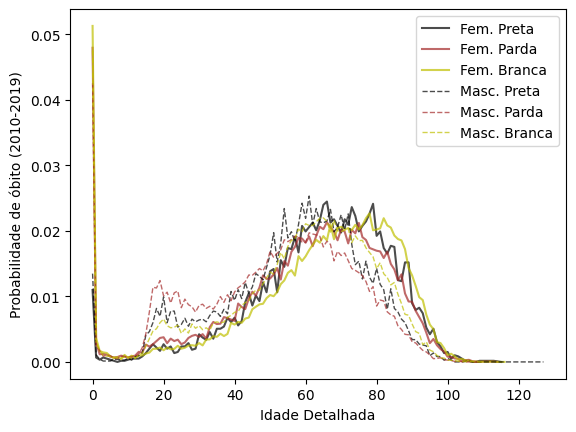

In [28]:
# Seleciona apenas distritos com uma certa faixa de expectativa de vida:
distritos = exp_vida.sort_values()[:15].index # Distritos com expectativa mais baixa.
#distritos = None # Seleciona todos os distritos.

probabilidade_obito_por_idade(fem_preta_df, distritos=distritos).plot(label='Fem. Preta', color='k', alpha=0.7)
probabilidade_obito_por_idade(fem_parda_df, distritos=distritos).plot(label='Fem. Parda', color='brown', alpha=0.7)
probabilidade_obito_por_idade(fem_branca_df, distritos=distritos).plot(label='Fem. Branca', color='y', alpha=0.7)
probabilidade_obito_por_idade(masc_preta_df, distritos=distritos).plot(label='Masc. Preta', color='k', linestyle='--', linewidth=1, alpha=0.7)
probabilidade_obito_por_idade(masc_parda_df, distritos=distritos).plot(label='Masc. Parda', color='brown', linestyle='--', linewidth=1, alpha=0.7)
probabilidade_obito_por_idade(masc_branca_df, distritos=distritos).plot(label='Masc. Branca', color='y', linestyle='--', linewidth=1, alpha=0.7)
pl.ylabel('Probabilidade de óbito (2010-2019)')
pl.legend()

pl.show()

### 3.4. Checagem dos dados

Pode ser interessante construir códigos que verificam a integridade dos dados e se eles de fato são o que acreditamos que eles sejam. 
Aqui, por exemplo, vamos verificar que o nome do arquivo de fato corresponde ao segmento da população selecionado:  

In [29]:
# Verifica se recorte é o especificado no nome do arquivo:
for arq in arquivos:
    # Pega sexo e cor do recorte:
    sexo, cor = pega_sexo_cor(arq)
    # Imprime:
    print(arq.split('_')[-1], sexo, cor)

masc-preta.csv Masculino Preta
fem-preta.csv Feminino Preta
fem-amarela.csv Feminino Amarela
ignorado-parda.csv Ignorado Parda
masc-parda.csv Masculino Parda
ignorado-branca.csv Ignorado Branca
masc-branca.csv Masculino Branca
fem-ninfo.csv Feminino Não informado
ignorado-amarela.csv Ignorado Amarela
ignorado-preta.csv Ignorado Preta
fem-parda.csv Feminino Parda
masc-amarela.csv Masculino Amarela
masc-indigena.csv Masculino Indígena
fem-indigena.csv Feminino Indígena
fem-branca.csv Feminino Branca
ignorado-sinfo.csv Ignorado Não informado
masc-ninfo.csv Masculino Não informado


**Boa prática:** quando tiver terminado uma análise em um notebook, reinicie o notebook e rode ele novamente de ponta a ponta, para garantir que ele está reprodutível e fazendo exatamente o que diz fazer. Durante a análise, algum cógido pode ter sido alterado ou se perdido. Essa prática detecta esse tipo de problema.  